In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [287]:
df = pd.read_csv('Algerian_forest_dataset.csv', header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [288]:
## Data Cleaning
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [289]:
df[df.isnull().any(axis=1)] ## Checking for the Columns that are null

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [290]:
df.loc[:122,"Region"] = 0  ## setting the value of region upto 122 rows = 0
df.loc[122:, "Region"] = 1 ## for next values we are setting this region as 1

In [291]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [292]:
df[["Region"]] = df[["Region"]].astype(int)

In [293]:
df = df.dropna().reset_index(drop=True)

In [294]:
df.iloc[122]

day                    day
month                month
year                  year
Temperature    Temperature
 RH                     RH
 Ws                     Ws
Rain                 Rain 
FFMC                  FFMC
DMC                    DMC
DC                      DC
ISI                    ISI
BUI                    BUI
FWI                    FWI
Classes          Classes  
Region                   1
Name: 122, dtype: object

In [295]:
df = df.drop(122).reset_index(drop=True)

In [296]:
df.iloc[122]

day                     01
month                   06
year                  2012
Temperature             32
 RH                     71
 Ws                     12
Rain                   0.7
FFMC                  57.1
DMC                    2.5
DC                     8.2
ISI                    0.6
BUI                    2.8
FWI                    0.2
Classes        not fire   
Region                   1
Name: 122, dtype: object

In [297]:
df.columns=df.columns.str.strip()

In [298]:
## Change the required columns into int
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [299]:
df[['month','day','year','Temperature','RH','Ws']]=df[['month','day','year','Temperature','RH','Ws']].astype(int)

In [300]:
objects = [features for features in df.columns if df[features].dtype == 'O']

In [301]:
for i in objects:
    if i != 'Classes':
        df[i] = df[i].astype(float)

In [302]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [303]:
## Save the cleanest dataset
df.to_csv('Cleaned_Algerian_forest_dataset.csv', index=False)

## Exploratory Data Analysis


In [304]:
df_copy = df.drop(['day', 'month', 'year'], axis=1)

In [305]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [306]:
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'), 0, 1)

In [311]:
!pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.0 MB 5.0 MB/s eta 0:00:02
   ------------- -------------------------- 2.6/8.0 MB 6.6 MB/s eta 0:00:01
   -------------------- ------------------- 4.2/8.0 MB 6.8 MB/s eta 0:00:01
   ------------------------ --------------- 5.0/8.0 MB 6.6 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.0 MB 6.4 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/8.0 MB 5.9 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 5.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.6 MB 8.5 MB/s eta 0:00:02
   ---- ----------------------------------- 1.3/12.6 MB 3.1 MB/s eta 

ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'C:\\Python312\\Scripts\\f2py.exe' -> 'C:\\Python312\\Scripts\\f2py.exe.deleteme'


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Python312\python.exe -m pip install --upgrade pip


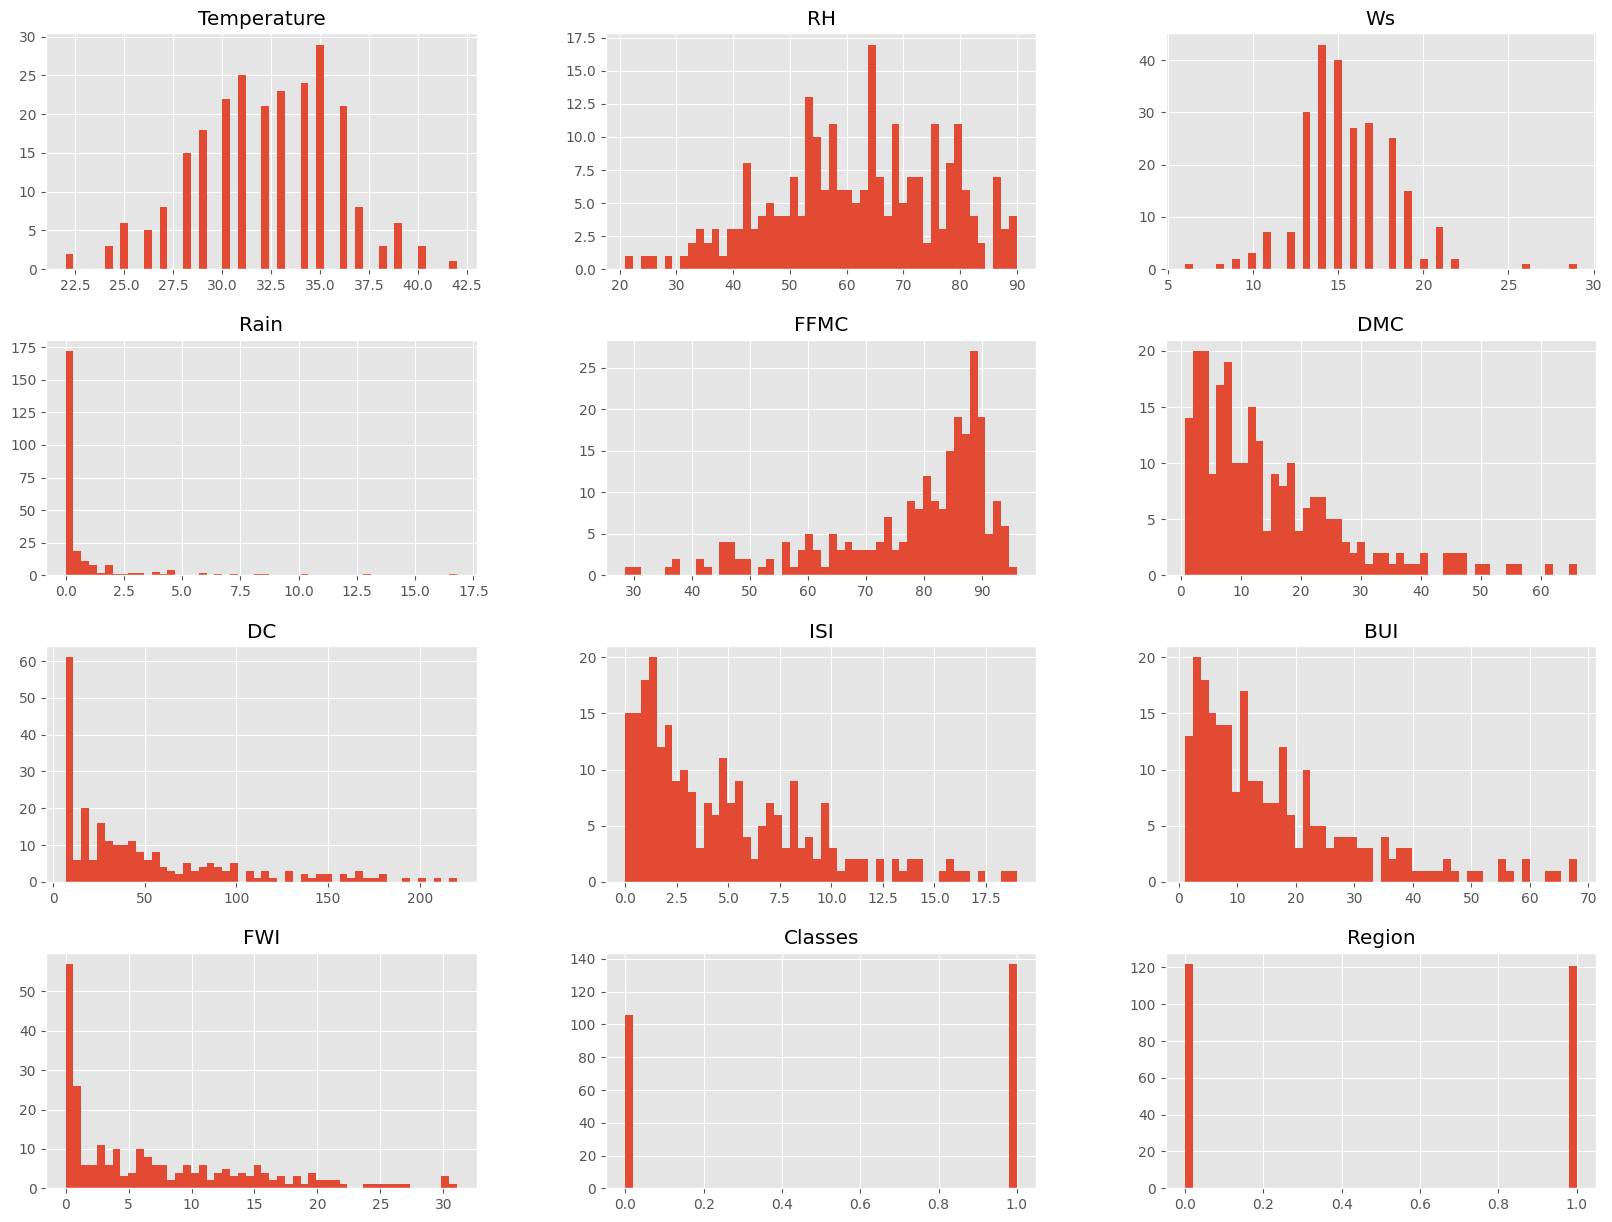

In [314]:
plt.style.use('ggplot')

df_copy.hist(bins=50, figsize=(20, 15))
plt.show()

In [316]:
## Percentage for Pie Chart
percentage=df_copy['Classes'].value_counts(normalize=True)*100
percentage

Classes
1    56.378601
0    43.621399
Name: proportion, dtype: float64

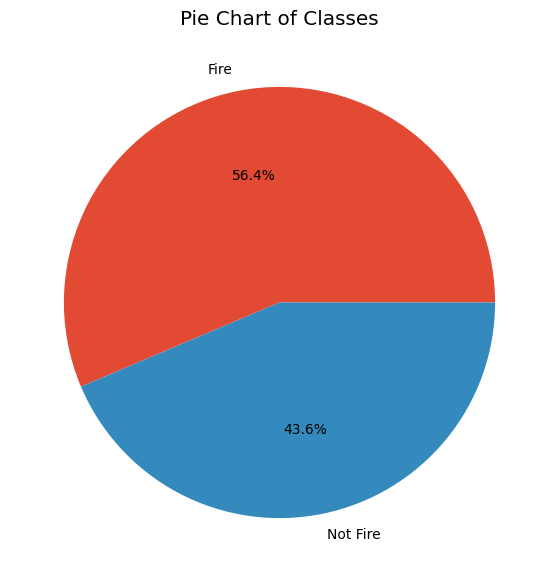

In [317]:
## Plotting pie chart 
classlabels=["Fire","Not Fire"]
plt.figure(figsize=(8,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title("Pie Chart of Classes")
plt.show()